In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [5]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where "
    "phase >= -10 and phase <= 30 and ((dm15_source between 0.9 and 1.2) or (dm15_from_fits between 0.9 and 1.2)) "
    "AND av_25 < 0.75 AND Events.SN != '2006bt' AND Events.SN != '2005hk' AND SNR > 25 AND delta_res > 0.05"]

In [6]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1_DEV_cesar.db')
copy_array = copy.deepcopy(spec_array)

84 Total Spectra found
84 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
2007as SN07as_070319_b01_DUP_BC.dat csp 70.89109373358968 -1.3021191622454595 54178.06999999983 0.017572 12.0 3412.0 9408.0
2007as SN07as_070326_b01_DUP_BC.dat csp 49.54227690861507 5.596655568209611 54185.08999999985 0.017572 12.0 3394.0 9392.0
2007as SN07as_070418_b01_DUP_WF.dat csp 42.211864406451525 28.29775190349904 54208.189999999944 0.017572 12.0 3788.0 9024.0
2007jg SN07jg_070922_b01_CLA_LD.dat csp 48.72432842150623 -0.619979539819759 54365.37999999989 0.037131 None 3638.0 9554.0
2007jg SN07jg_071003_b01_3P6_EF.dat csp 54.07878747767615 9.928350420372464 54376.31999999983 0.037131 None 3234.0 5806.0
2007jg SN07jg_071003_r01_3P6_EF.dat csp 33.3513050626165 9.966918354449502 54376.35999999987 0.037131 None 5086.0 8878.0
2007jg SN07jg_071008_b01_BAA_IM.dat csp 53.16627591124253 14.778268126294638 54381.35000000009

In [7]:
print (spec_array[0].event_data.keys())

dict_keys(['SN', 'RA', 'DEC', 'zCMB_salt', 'e_zCMB_salt', 'Bmag_salt', 'e_Bmag_salt', 's_salt', 'e_s_salt', 'c_salt', 'e_c_salt', 'mu_salt', 'e_mu_salt', 'zCMB_salt2', 'e_zCMB_salt2', 'Bmag_salt2', 'e_Bmag_salt2', 'x1_salt2', 'e_x1_salt2', 'c_salt2', 'e_c_salt2', 'mu_salt2', 'e_mu_salt2', 'zCMB_mlcs31', 'e_zCMB_mlcs31', 'mu_mlcs31', 'e_mu_mlcs31', 'delta_mlcs31', 'e_delta_mlcs31', 'av_mlcs31', 'e_av_mlcs31', 'zCMB_mlcs17', 'e_zCMB_mlcs17', 'mu_mlcs17', 'e_mu_mlcs17', 'delta_mlcs17', 'e_delta_mlcs17', 'av_mlcs17', 'e_av_mlcs17', 'glon_host', 'glat_host', 'cz_host', 'czLG_host', 'czCMB_host', 'mtype_host', 'xpos_host', 'ypos_host', 't1_host', 'filt_host', 'Ebv_host', 'zCMB_lc', 'zhel_lc', 'mb_lc', 'e_mb_lc', 'c_lc', 'e_c_lc', 'x1_lc', 'e_x1_lc', 'logMst_lc', 'e_logMst_lc', 'tmax_lc', 'e_tmax_lc', 'cov_mb_s_lc', 'cov_mb_c_lc', 'cov_s_c_lc', 'bias_lc', 'Av_MW', 'Av_25', 'MJD_max', 'Dm15_source', 'Dm15_from_fits', 'e_dm15', 'separation', 'NED_host', 'V_at_max', 'V_err', 'Redshift', 'M_b_cfa

In [8]:
spec_array_dered = kpora.host_dereddening(copy_array, verbose=False, cutoff=2.)

In [9]:
for i,spec in enumerate(spec_array_dered):
    print (i, spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2])

0 2007as SN07as_070319_b01_DUP_BC.dat csp -1.3021191622454595 3412.0 9408.0
1 2007as SN07as_070326_b01_DUP_BC.dat csp 5.596655568209611 3394.0 9392.0
2 2007as SN07as_070418_b01_DUP_WF.dat csp 28.29775190349904 3788.0 9024.0
3 2007jg SN07jg_070922_b01_CLA_LD.dat csp -0.619979539819759 3638.0 9554.0
4 2007jg SN07jg_071003_b01_3P6_EF.dat csp 9.928350420372464 3234.0 5806.0
5 2007jg SN07jg_071003_r01_3P6_EF.dat csp 9.966918354449502 5086.0 8878.0
6 2007jg SN07jg_071008_b01_BAA_IM.dat csp 14.778268126294638 3818.0 6350.0
7 2007jg SN07jg_071008_r01_BAA_IM.dat csp 14.778268126294638 6510.0 9580.0
8 2007jg sn2007jg-20070920.46-fast.flm cfa -2.471240373686565 3402.0 7100.0
9 2007qe sn2007qe-20071115.28-fast.flm cfa -9.39901960784268 3462.0 7222.0
10 2007qe sn2007qe-20071116.11-fast.flm cfa -8.58529411764489 3460.0 7220.0
11 2007qe sn2007qe-20071203.12-fast.flm cfa 8.091176470592401 3462.0 7220.0
12 2007qe sn2007qe-20071204.14-fast.flm cfa 9.091176470589263 3462.0 7224.0
13 2007qe sn2007qe-20071

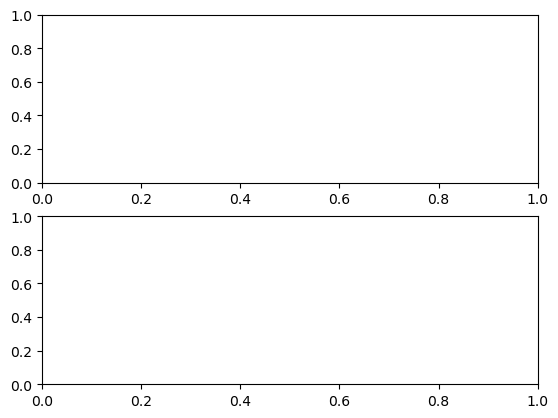

In [10]:
fig, ax = plt.subplots(2,1)
for spec in spec_array:
    if spec.filename == 'sn2007af-20070310.46-fast.flm':
        for spec_dered in spec_array_dered:
            if spec_dered.filename == 'sn2007af-20070310.46-fast.flm':
                print (spec.filename, spec_dered.filename)
                ax[0].plot(spec.wavelength, spec.flux)
                ax[1].plot(spec.wavelength, 1/spec.ivar)
                ax[0].plot(spec_dered.wavelength, spec_dered.flux)
                ax[1].plot(spec_dered.wavelength, 1/spec_dered.ivar)
                plt.show()

In [11]:
spec_attributes = dir(spec_array[0])
print (len(spec_array))
for att in spec_attributes:
    print (att)

84
SNR
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


In [43]:
# ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where "
#     "phase >= -10 and phase <= 30 and ((dm15_source between 0.9 and 1.2) or (dm15_from_fits between 0.9 and 1.2)) "
#     "AND av_25 < 0.75 AND Events.SN != '2006bt' AND Events.SN != '2005hk' AND SNR > 25 AND delta_res > 0.05"]
# SN06ax_060323_b01_DUP_WF.dat
# sn2007qe-20071115.28-fast.flm
# sn2006ax-20060323.31-fast.flm
# sn2007qe-20071116.11-fast.flm
# SN06ax_060324_b01_DUP_WF.dat
# sn2006ax-20060324.30-fast.flm
# sn2006ax-20060326.29-fast.flm
# SN08hv_081210_b01_NTT_EF.dat
# SN08hv_081210_r01_NTT_EF.dat
# sn2007co-20070608.35-fast.flm
# sn2007co-20070609.33-fast.flm
# sn2007co-20070609.398-ui-corrected.flm

# sn2007le-20071118.182-ui-corrected.flm
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where "
            "filename = 'sn2007le-20071118.182-ui.flm'"
           ]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '../data/kaepora_v1_DEV_cesar.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr = True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename = 'sn2007le-20071118.182-ui.flm'
0 Total Spectra found
0 flagged spectra removed 0 spectra left
0 spectra of peculiar Ias removed 0 spectra left
0 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
0 total SNe
removed spectra of SNe with A_V > 2.0
Using 0 spectra of 0 SNe
No spectra found


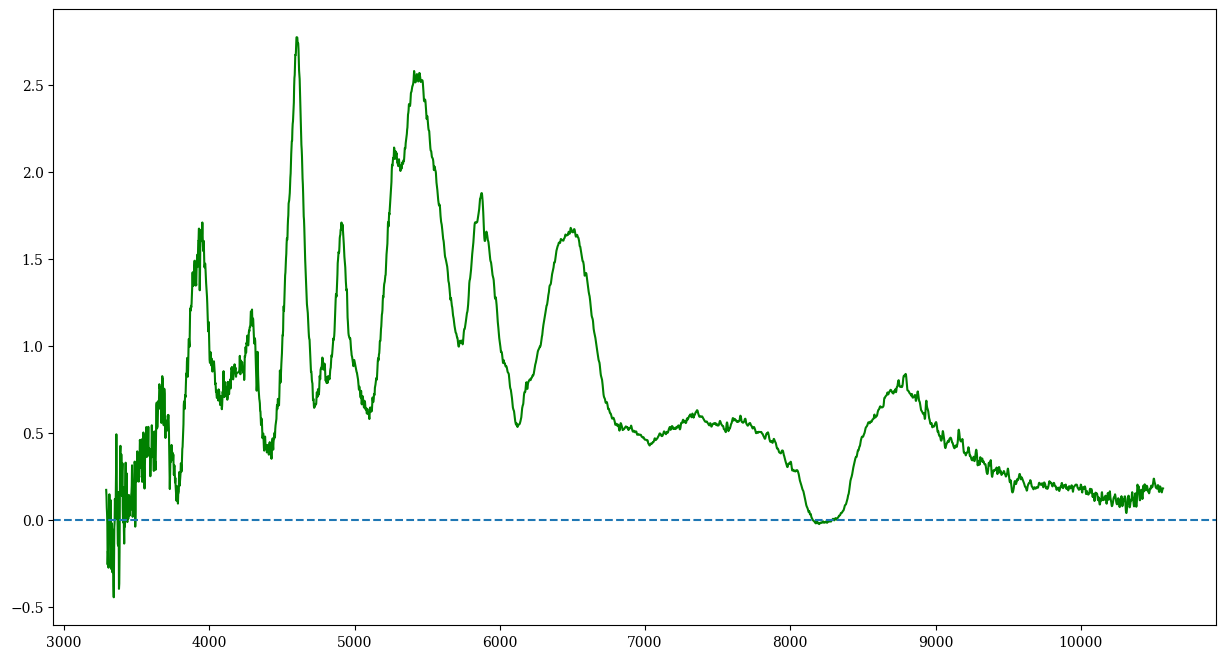

In [36]:
plt.figure(figsize = [15,8])
for b in og_SN_Arrays[0]:
    plt.plot(b.wavelength, b.flux, 'g')
    plt.axhline(0, ls ='--')
# plt.plot(composites[0].wavelength, composites[0].flux, 'k')
plt.show()


[[3.31000e+03 3.31200e+03 3.31400e+03 ... 1.06360e+04 1.06380e+04
  1.06400e+04]
 [3.18023e-01 7.60810e-01 6.91759e-01 ... 1.53750e+00 1.56574e+00
  1.64171e+00]
 [1.34386e+00 1.34386e+00 1.34386e+00 ... 1.00000e+00 1.00000e+00
  1.00000e+00]]


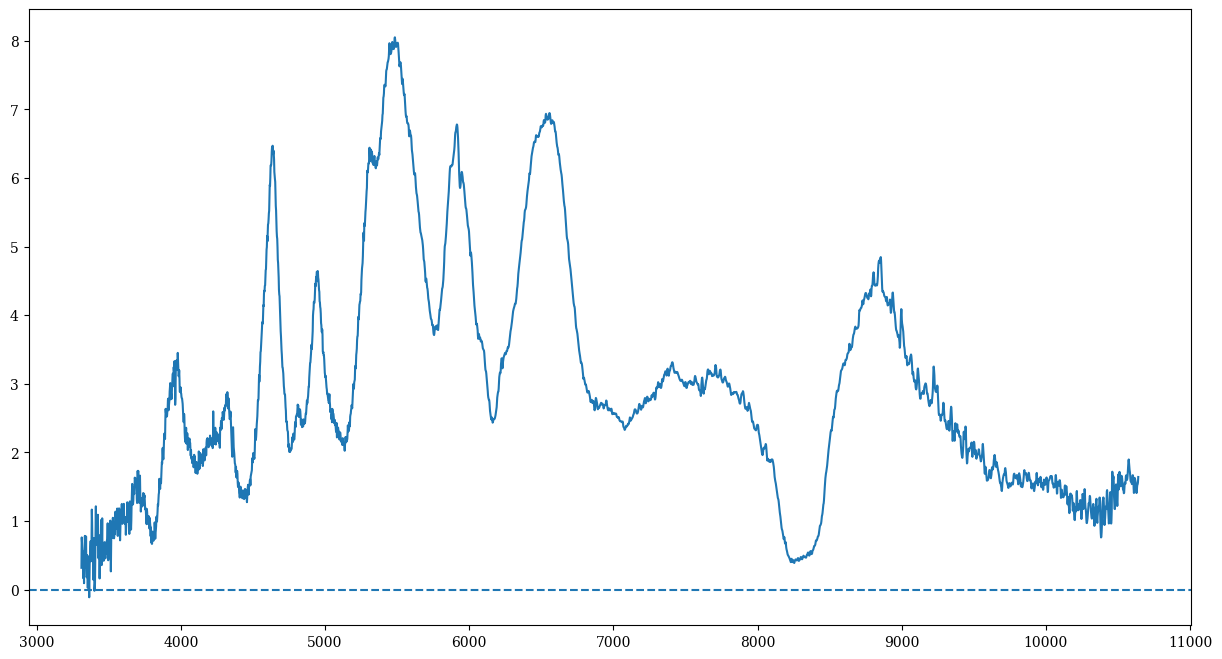

In [42]:
data = np.genfromtxt('../data/spectra/bsnip/sn2007le-20071118.182-ui-corrected.flm',unpack=True)
#sn2007le-20071118.182-ui.flm
data = np.genfromtxt('../data/spectra/bsnip/sn2007le-20071118.182-ui.flm',unpack=True)
print (data)
plt.figure(figsize = [15,8])
plt.plot(data[0], data[1])
plt.axhline(0, ls ='--')
plt.show()

In [32]:
kpora.set_min_num_spec(composites, 1)
kplot.comparison_plot(composites, scale_type=False, min_num_show=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x1500 with 0 Axes>

2007le


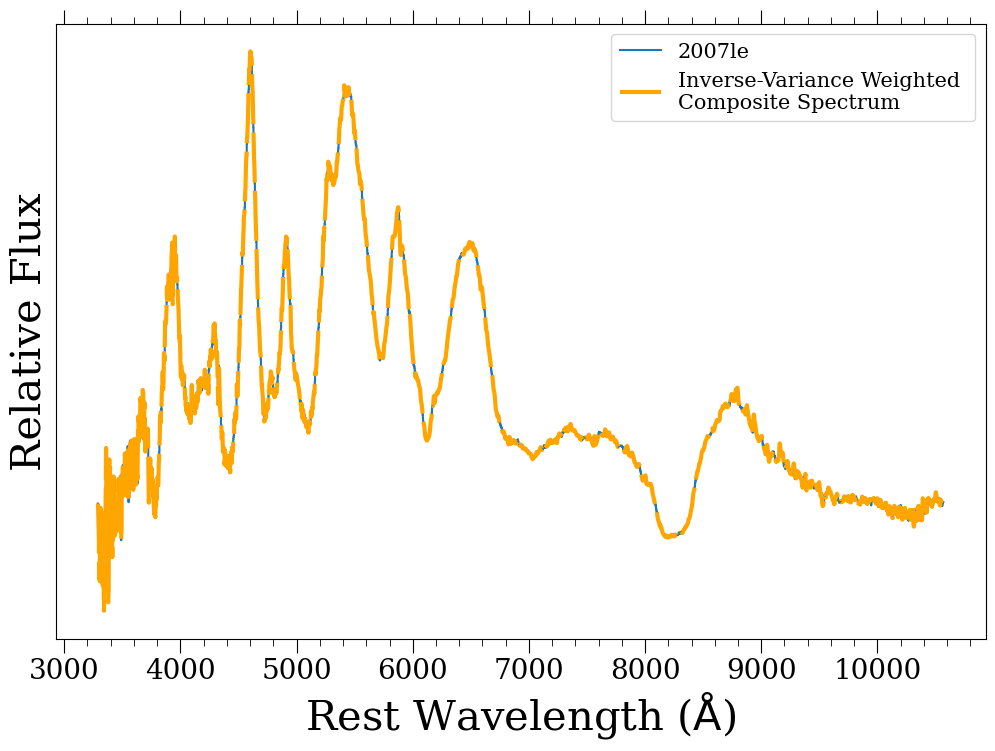

In [33]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)

2006ax


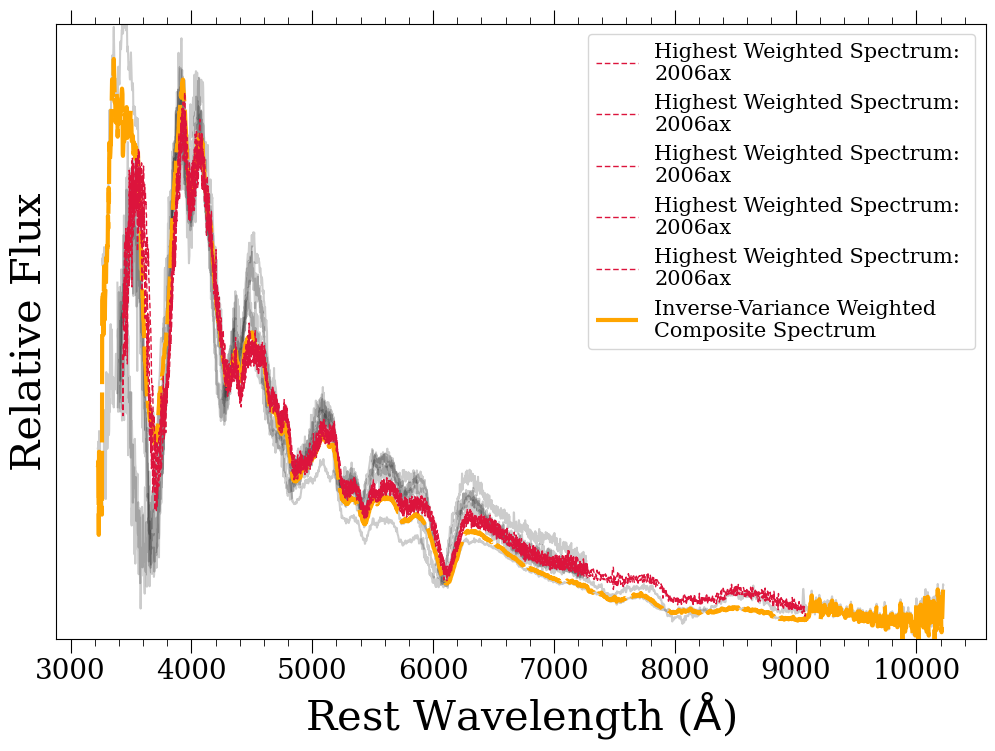

In [29]:
kplot.plot_comp_and_all_spectra(composites[0], og_SN_Arrays[0], dm15=True, show_ivar=False, one_color=True, ylim=[0,110])